**Bike sharing Demand**



Bike sharing systems are a means of renting bicycles where the process of obtaining membership, rental, and bike return is automated via a network of kiosk locations throughout a city. Using these systems, people are able rent a bike from a one location and return it to a different place on an as-needed basis. Currently, there are over 500 bike-sharing programs around the world.

The data generated by these systems makes them attractive for researchers because the duration of travel, departure location, arrival location, and time elapsed is explicitly recorded. Bike sharing systems therefore function as a sensor network, which can be used for studying mobility in a city. In this competition, participants are asked to combine historical usage patterns with weather data in order to forecast bike rental demand in the Capital Bikeshare program in Washington, D.C.

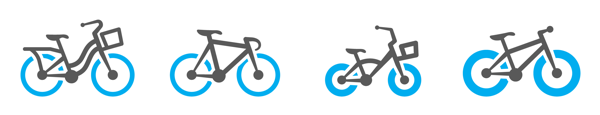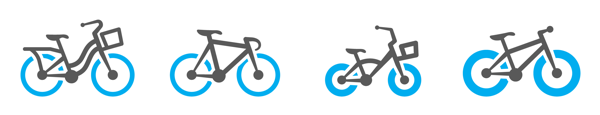

In [1]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import plotly.graph_objects as go
import warnings
warnings.simplefilter('ignore')

%matplotlib inline

In [2]:
train = pd.read_csv('../input/bikesharingdemand/train.csv')
test = pd.read_csv('../input/bikesharingdemand/test.csv')

In [3]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
train.shape,test.shape

((10886, 12), (6493, 9))

In [5]:
#ratio of null values
train.isnull().sum()/train.shape[0] *100

datetime      0.0
season        0.0
holiday       0.0
workingday    0.0
weather       0.0
temp          0.0
atemp         0.0
humidity      0.0
windspeed     0.0
casual        0.0
registered    0.0
count         0.0
dtype: float64

In [6]:
#ratio of null values
test.isnull().sum()/test.shape[0] *100

datetime      0.0
season        0.0
holiday       0.0
workingday    0.0
weather       0.0
temp          0.0
atemp         0.0
humidity      0.0
windspeed     0.0
dtype: float64

In [7]:
#categorical features
categorical = train.select_dtypes(include =[np.object])
print("Categorical Features in Train Set:",categorical.shape[1])

#numerical features
numerical= train.select_dtypes(include =[np.float64,np.int64])
print("Numerical Features in Train Set:",numerical.shape[1])

Categorical Features in Train Set: 1
Numerical Features in Train Set: 11


In [8]:
#categorical features
categorical = test.select_dtypes(include =[np.object])
print("Categorical Features in Train Set:",categorical.shape[1])

#numerical features
numerical= test.select_dtypes(include =[np.float64,np.int64])
print("Numerical Features in Train Set:",numerical.shape[1])

Categorical Features in Train Set: 1
Numerical Features in Train Set: 8


In [9]:
train.isnull().sum(),test.isnull().sum()

(datetime      0
 season        0
 holiday       0
 workingday    0
 weather       0
 temp          0
 atemp         0
 humidity      0
 windspeed     0
 casual        0
 registered    0
 count         0
 dtype: int64,
 datetime      0
 season        0
 holiday       0
 workingday    0
 weather       0
 temp          0
 atemp         0
 humidity      0
 windspeed     0
 dtype: int64)

In [10]:
train['count'].value_counts()

5      169
4      149
3      144
6      135
2      132
      ... 
801      1
629      1
825      1
589      1
636      1
Name: count, Length: 822, dtype: int64

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [12]:
train.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [13]:
#Split time and date from 'datetime' column
train['datetime'] = pd.to_datetime(train['datetime'])
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour

In [14]:
#Look at head of data_set after split time and date(convert to int)
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


In [15]:
#Add 'weekend' column to check it's effect on bike renting
ls = []
for i in range(train.shape[0]):
    if train['holiday'][i] == 0 and train['workingday'][i] == 0:
        ls.append(1)
    else:
        ls.append(0)
train['weekend'] = ls

In [16]:
#Look at head of data_set after split time and date(convert to int)
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,weekend
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,1


In [17]:
#Calculate counts for workingday, weekend and holiday. This is for check effect of these parameters on bike renting.
#for workingday_holiday_weekend
working = 0
weekend = 0
holiday = 0
for i in range(train.shape[0]):
    if train['workingday'][i] == 1:
        working += train['count'][i]
    elif train['weekend'][i] == 1:
        weekend += train['count'][i]
    elif train['holiday'][i] == 1:
        holiday += train['count'][i]
        
data = {'daystype':['workingday', 'weekend', 'holiday'], 'count':[working, weekend, holiday]}
traindt = pd.DataFrame(data)

In [18]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,weekend
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132,2011.501929,6.521495,9.992559,11.541613,0.290557
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454,0.500019,3.444373,5.476608,6.915838,0.454040
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000,2011.000000,1.000000,1.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000,2011.000000,4.000000,5.000000,6.000000,0.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000,2012.000000,7.000000,10.000000,12.000000,0.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000,2012.000000,10.000000,15.000000,18.000000,1.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000,2012.000000,12.000000,19.000000,23.000000,1.000000


**Data Preprocessing**

In [19]:
train.corr()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,weekend
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439,-0.004797,0.971524,0.001729,-0.006546,-0.002433
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393,0.012021,0.001731,-0.015877,-0.000354,-0.109748
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594,-0.002482,-0.003394,0.009829,0.002780,-0.934780
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655,-0.012548,0.012144,-0.007890,-0.022740,-0.032078
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454,0.061226,0.257589,0.015551,0.145430,-0.030873
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784,0.058540,0.264173,0.011866,0.140343,-0.023405
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371,-0.078606,0.204537,-0.011335,-0.278011,0.010463
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369,-0.015221,-0.150192,0.036157,0.146631,-0.016816
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414,0.145241,0.092722,0.014109,0.302045,0.311558
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948,0.264265,0.169451,0.019111,0.380540,-0.114959


In [20]:
X = train[['hour','casual','registered']]
Y = train[['count']]

In [21]:
print(X)

       hour  casual  registered
0         0       3          13
1         1       8          32
2         2       5          27
3         3       3          10
4         4       0           1
...     ...     ...         ...
10881    19       7         329
10882    20      10         231
10883    21       4         164
10884    22      12         117
10885    23       4          84

[10886 rows x 3 columns]


<AxesSubplot:>

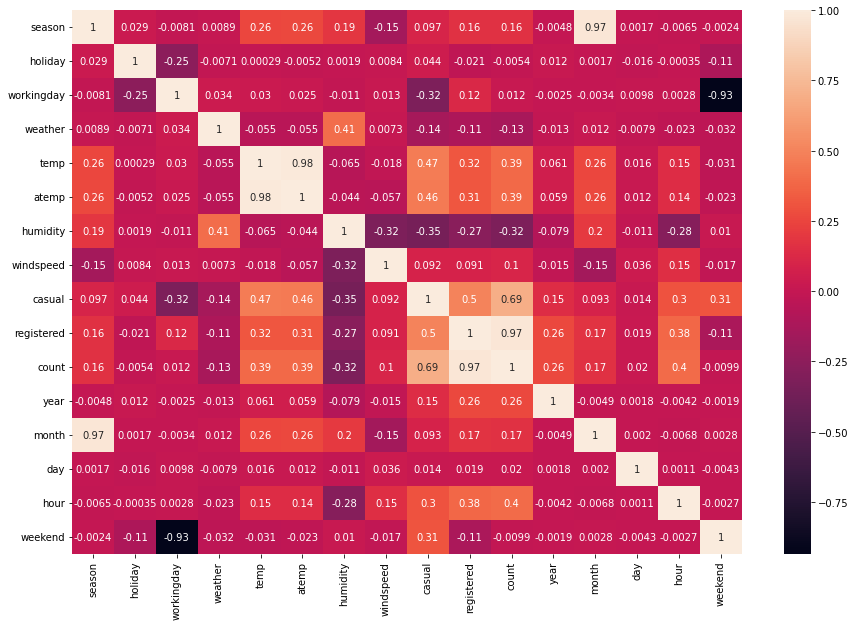

In [22]:
plt.figure(figsize=(15,10))
sns.heatmap(train.corr(), annot=True )

Text(0.5, 1.0, 'Bike renting count according to weekdays type')

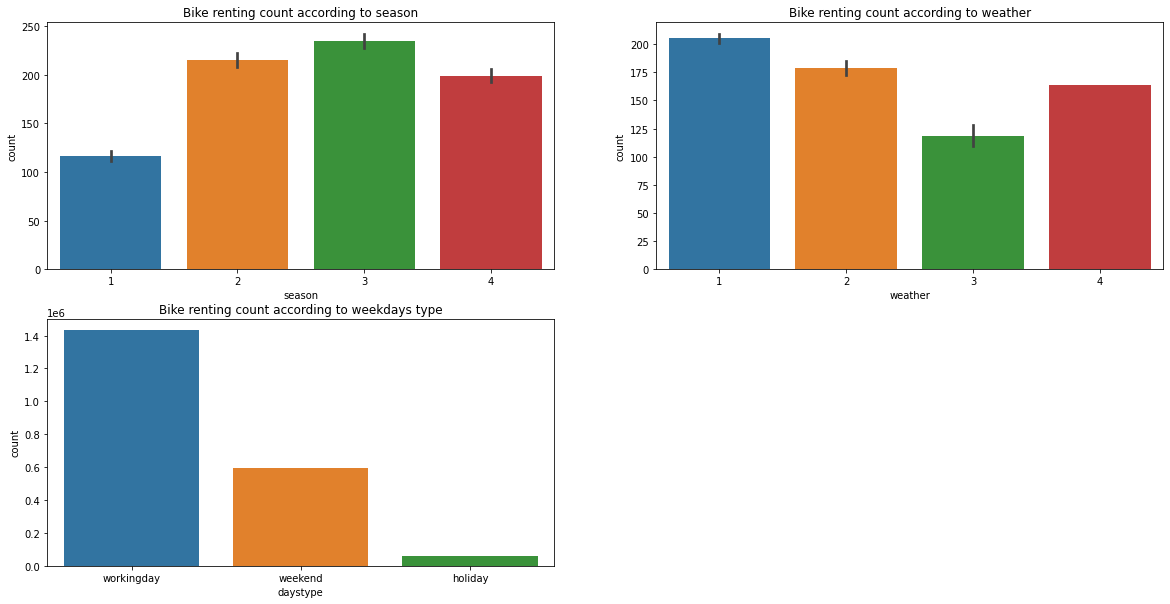

In [23]:
fig = plt.figure(figsize=(20,10))

axs1 = fig.add_subplot(221)
sns.barplot(x='season', y='count', data=train)
axs1.set_title('Bike renting count according to season')

axs2 = fig.add_subplot(222)
sns.barplot(x='weather', y='count', data=train)
axs2.set_title('Bike renting count according to weather')

axs3 = fig.add_subplot(223)
sns.barplot(x='daystype', y='count', data=traindt)
axs3.set_title('Bike renting count according to weekdays type')

**Train your model (Regression)**

In [24]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [25]:
X_train, X_test , y_train , y_test = train_test_split(X,Y,test_size=0.25,random_state=26)

In [26]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [27]:
predictions=regressor.predict(X_test)

In [28]:
y_test

,count
2962,417
6888,638
8035,14
1120,259
6212,4
...,...
8528,755
7962,12
8424,327
7386,5


In [29]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Mean Absolute Error: 7.508721377545478e-14
Mean Squared Error: 1.2016496591911375e-26
Root Mean Squared Error: 1.096197819369815e-13


In [30]:
regressor.coef_

array([[9.95551626e-15, 1.00000000e+00, 1.00000000e+00]])

In [31]:
# Hyperparameter tuning

from sklearn.ensemble import RandomForestRegressor
# random_forest=RandomForestRegressor() # For GBM, use GradientBoostingClassifier()
# grid_values = {'n_estimators':[50, 80,  100], 'max_depth':[3, 5, 7]}
# #n_estimators=no of trees
# #max_depth=How much maximum depth the d-tree is goes
# random_forest= GridSearchCV(random_forest, param_grid = grid_values, scoring = 'roc_auc', cv=5)

# # Fit the object to train dataset
# random_forest.fit(x_train, y_train)
#creating an instance for the random forest
rf_model=RandomForestRegressor()
rf_model.fit(X_train,y_train)

RandomForestRegressor()

In [32]:
# y_pred_train_rf = random_forest.predict(x_train)
# y_pred_test_rf = random_forest.predict(x_test)
y_pred_train_rf = rf_model.predict(X_train)
y_pred_test_rf = rf_model.predict(X_test)

In [33]:
#metric score for the rf for train dataset
from sklearn.metrics import mean_squared_error
print("Model Score:",rf_model.score(X_train,y_train))

MSE= mean_squared_error(y_train, y_pred_train_rf)
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)
from sklearn.metrics import r2_score
r2= r2_score(y_train, y_pred_train_rf)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_rf))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
train['Random_forest']=MSE,RMSE,r2,1-(1-r2_score(y_train, y_pred_train_rf))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))

Model Score: 0.9999650239405711
MSE : 1.1241781969622733
RMSE : 1.06027269933837
R2 : 0.9999650239405711
Adjusted R2 : 0.9999649853356489


ValueError: Length of values (4) does not match length of index (10886)

In [34]:
# test random forest
print("Model Score:",rf_model.score(X_test,y_test))

MSE= mean_squared_error(y_test, y_pred_test_rf)
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)
from sklearn.metrics import r2_score
r2= r2_score(y_test, y_pred_test_rf)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_test, y_pred_test_rf))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
test['Random_forest']=MSE,RMSE,r2,1-(1-r2_score(y_test, y_pred_test_rf))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))

Model Score: 0.9997293380289447
MSE : 9.402786994856722
RMSE : 3.0663964184131056
R2 : 0.9997293380289447
Adjusted R2 : 0.9997290392850473


ValueError: Length of values (4) does not match length of index (6493)

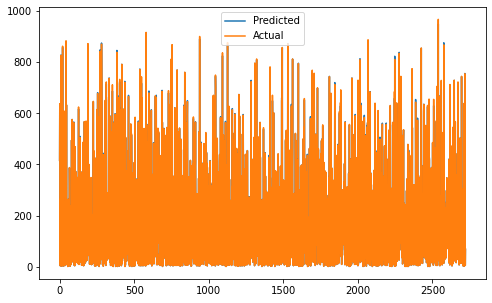

In [35]:
#pred vs actual for random forest
plt.figure(figsize=(8,5))
plt.plot((np.array(y_pred_test_rf)))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()